# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables? 
2. Why do trees tend to overfit, and how can this tendency be constrained? 
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Question 1
Gini is a good loss function for categorical target variables because it directly measures how mixed the classes are within a node. It quantifies how often a randomly chosen sample from a node would be incorrectly labeled if we randomly assigned labels according to the class distribution in that node. A lower Gini means purer and more homogeneous nodes. It is also computationally simple and differentiates well between nodes with slightly different class proportions, helping the tree algorithm find informative splits efficiently.

Question 2
Trees tend to overfit because they are very flexible. They can keep splitting the data into smaller and smaller regions until each leaf fits the training data almost perfectly. This tendency can be constrained by limiting tree depth, requiring a minimum number of samples per split or per leaf, or using ensemble methods like to reduce variance.

Question 3
False. Decision trees can perform well with both categorical and numerical features. They perform well when relationships are nonlinear or involve interactions between features, regardless of feature type. Trees are better with numerical variables than categorical ones if there are many categories, since that can lead to many possible splits and potential overfitting.

Question 4
Most versions of classification/regression tree concept don't allow for more than two branches after a split because it simplifies the search for optimal splits and it produces balanced and easier to interpret trees. Binary splits make the recursive splitting and pruning algorithms more efficient and consistent. Multibranch splits can be used but are more complex and may overfit more easily.

Question 5
Some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting are when the tree is very deep, has many leaves with few samples, and training accuracy is much higher than test accuracy for overfitting and when the tree is too shallow, with few splits, and both training and test accuracies are low.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Dataset shape (rows, columns): (2029, 31)

First few rows:
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  e

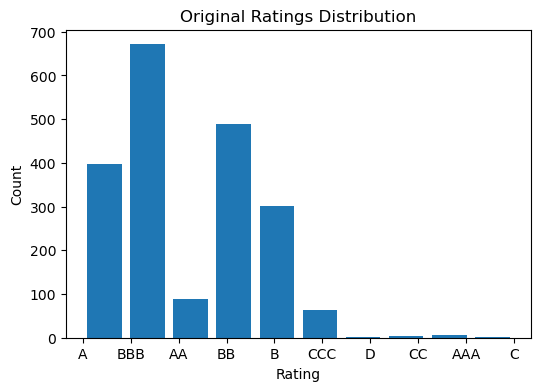

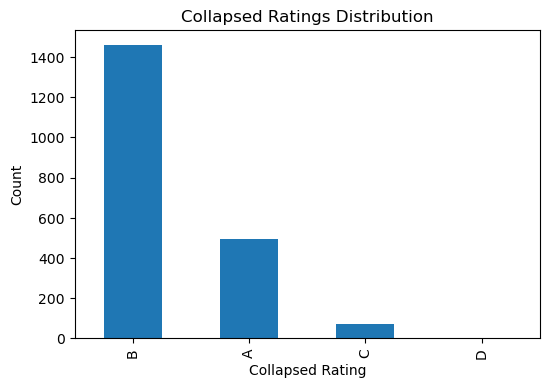


Confusion Matrix:
    A    B   C  D
A  70   71   1  0
B  95  332  13  0
C   4   18   4  0
D   1    0   0  0

Accuracy: 0.667

Confusion Matrix with Rating Agency:
    A    B  C  D
A  91   50  1  0
B  96  336  8  0
C   2   18  6  0
D   0    1  0  0

Accuracy with Rating Agency: 0.711


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Load the `./data/corporate_ratings.csv` dataset
data = pd.read_csv('./data/corporate_ratings.csv')

# How many observations and variables does it contain?
print("Dataset shape (rows, columns):", data.shape)

# Print out the first few rows of data
print("\nFirst few rows:")
print(data.head())

# Plot a histogram of the `ratings` variable
plt.figure(figsize=(6, 4))
plt.hist(data["Rating"], bins=len(data["Rating"].unique()), rwidth=0.8)
plt.title("Original Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Collapse all AAA/AA/A ratings into just A, and similarly for B and C
def collapse_rating(r):
    r = str(r).strip().upper()
    if r.startswith('AAA') or r.startswith('AA') or r.startswith('A'):
        return 'A'
    elif r.startswith('BBB') or r.startswith('BB') or r.startswith('B'):
        return 'B'
    elif r.startswith('CCC') or r.startswith('CC') or r.startswith('C'):
        return 'C'
    elif r.startswith('D'):
        return 'D'
    else:
        return None

data['Collapsed_Rating'] = data['Rating'].apply(collapse_rating)

plt.figure(figsize=(6,4))
data['Collapsed_Rating'].value_counts().plot(kind='bar', title='Collapsed Ratings Distribution')
plt.xlabel('Collapsed Rating')
plt.ylabel('Count')
plt.show()

# Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.
X = data.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name', 'Collapsed_Rating'])
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

y = data['Collapsed_Rating']

X = X[y.notna()]
y = y[y.notna()]

# Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=2)
clf.fit(X_train, y_train)

# Print a confusion matrix and the accuracy of your model.
y_pred = clf.predict(X_test)

# Compute confusion matrix
classes = sorted(list(set(y_test) | set(y_pred)))  # all classes present in test or predictions
cm = confusion_matrix(y_test, y_pred, labels=classes)

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=classes, columns=classes))

print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 3))

# If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?
X_with_agency = data.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Collapsed_Rating'])
X_with_agency = pd.get_dummies(X_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_with_agency, y, test_size=0.3, random_state=42
)

clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=2)
clf2.fit(X_train2, y_train2)

y_pred2 = clf2.predict(X_test2)

classes2 = sorted(list(set(y_test2) | set(y_pred2)))
cm2 = confusion_matrix(y_test2, y_pred2, labels=classes2)

print("\nConfusion Matrix with Rating Agency:")
print(pd.DataFrame(cm2, index=classes2, columns=classes2))

print("\nAccuracy with Rating Agency:", round(accuracy_score(y_test2, y_pred2), 3))


Question 4
The model predicts the most common bond ratings (A and B) fairly well, as shown by the high counts along the diagonal of the confusion matrix. Rare ratings like C or D are predicted less reliably, likely due to the small number of training samples. Overall accuracy is 66.7%

Question 5
Including the rating agency slightly improves accuracy suggesting that the agency itself carries some predictive signal. This is likely because different agencies may have slightly different standards for assigning ratings. However, the main predictive power still comes from the company financials.
